In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

### 1. Dataset Import :

In [2]:
data = pd.read_csv("C:/Users/GURU/Python_Programs/Externship programme/Diabetes_prediction/diabetes_012_health_indicators_BRFSS2015.csv")

### 2. Data Preprocessing :

### Basic Data Exploration :

In [3]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
data.shape

(253680, 22)

In [6]:
int64_col = data.select_dtypes(include = 'int64')
print("Integer Columns: ", int64_col.columns.to_list())
float64_col = data.select_dtypes(include = 'float64')
print("Float Columns : ", float64_col.columns.to_list())
object_col = data.select_dtypes(include = 'object')
print("Object Columns : ", object_col.columns.to_list())
numeric_col = data.select_dtypes('number')
print("Numeric Columns : ", numeric_col.columns.to_list())

Integer Columns:  []
Float Columns :  ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Object Columns :  []
Numeric Columns :  ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [7]:
for column in numeric_col:
    value_counts = data[column].value_counts(dropna = False).reset_index()
    value_counts.columns = ['Value', 'Count']
    print(f"Value counts for column '{column}':\n{value_counts.to_string(index=False)}\n")

Value counts for column 'Diabetes_012':
 Value  Count
   0.0 213703
   2.0  35346
   1.0   4631

Value counts for column 'HighBP':
 Value  Count
   0.0 144851
   1.0 108829

Value counts for column 'HighChol':
 Value  Count
   0.0 146089
   1.0 107591

Value counts for column 'CholCheck':
 Value  Count
   1.0 244210
   0.0   9470

Value counts for column 'BMI':
 Value  Count
  27.0  24606
  26.0  20562
  24.0  19550
  25.0  17146
  28.0  16545
  23.0  15610
  29.0  14890
  30.0  14573
  22.0  13643
  31.0  12275
  32.0  10474
  21.0   9855
  33.0   8948
  34.0   7181
  20.0   6327
  35.0   5575
  36.0   4633
  37.0   4147
  19.0   3968
  38.0   3397
  39.0   2911
  40.0   2258
  18.0   1803
  41.0   1659
  42.0   1639
  43.0   1500
  44.0   1043
  45.0    819
  17.0    776
  46.0    750
  47.0    622
  48.0    484
  49.0    416
  50.0    372
  16.0    348
  51.0    253
  53.0    237
  52.0    215
  55.0    169
  15.0    132
  54.0    113
  56.0    109
  57.0     86
  58.0     71
  79.0

In [8]:
import warnings
warnings.filterwarnings("ignore")
data2 = data.copy() 
data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_012[data2['Diabetes_012'] == 0] = 'No Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 1] = 'Pre-Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 2] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

### Finding any null/empty values present in the dataset :

In [9]:
null_counts = data.isnull().sum()
total_counts = data.count()
dict_1 = {'Total Count' : total_counts, "Null Count" : null_counts}
null_table = pd.DataFrame(dict_1)
null_table.index.name = "Column Names"
null_table

,Total Count,Null Count
Column Names,,
Diabetes_012,253680,0
HighBP,253680,0
HighChol,253680,0
CholCheck,253680,0
BMI,253680,0
Smoker,253680,0
Stroke,253680,0
HeartDiseaseorAttack,253680,0
PhysActivity,253680,0


### Statistical Analysis :

In [10]:
data.describe()

Column Names,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### 3. Data Analysis (EDA) :

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

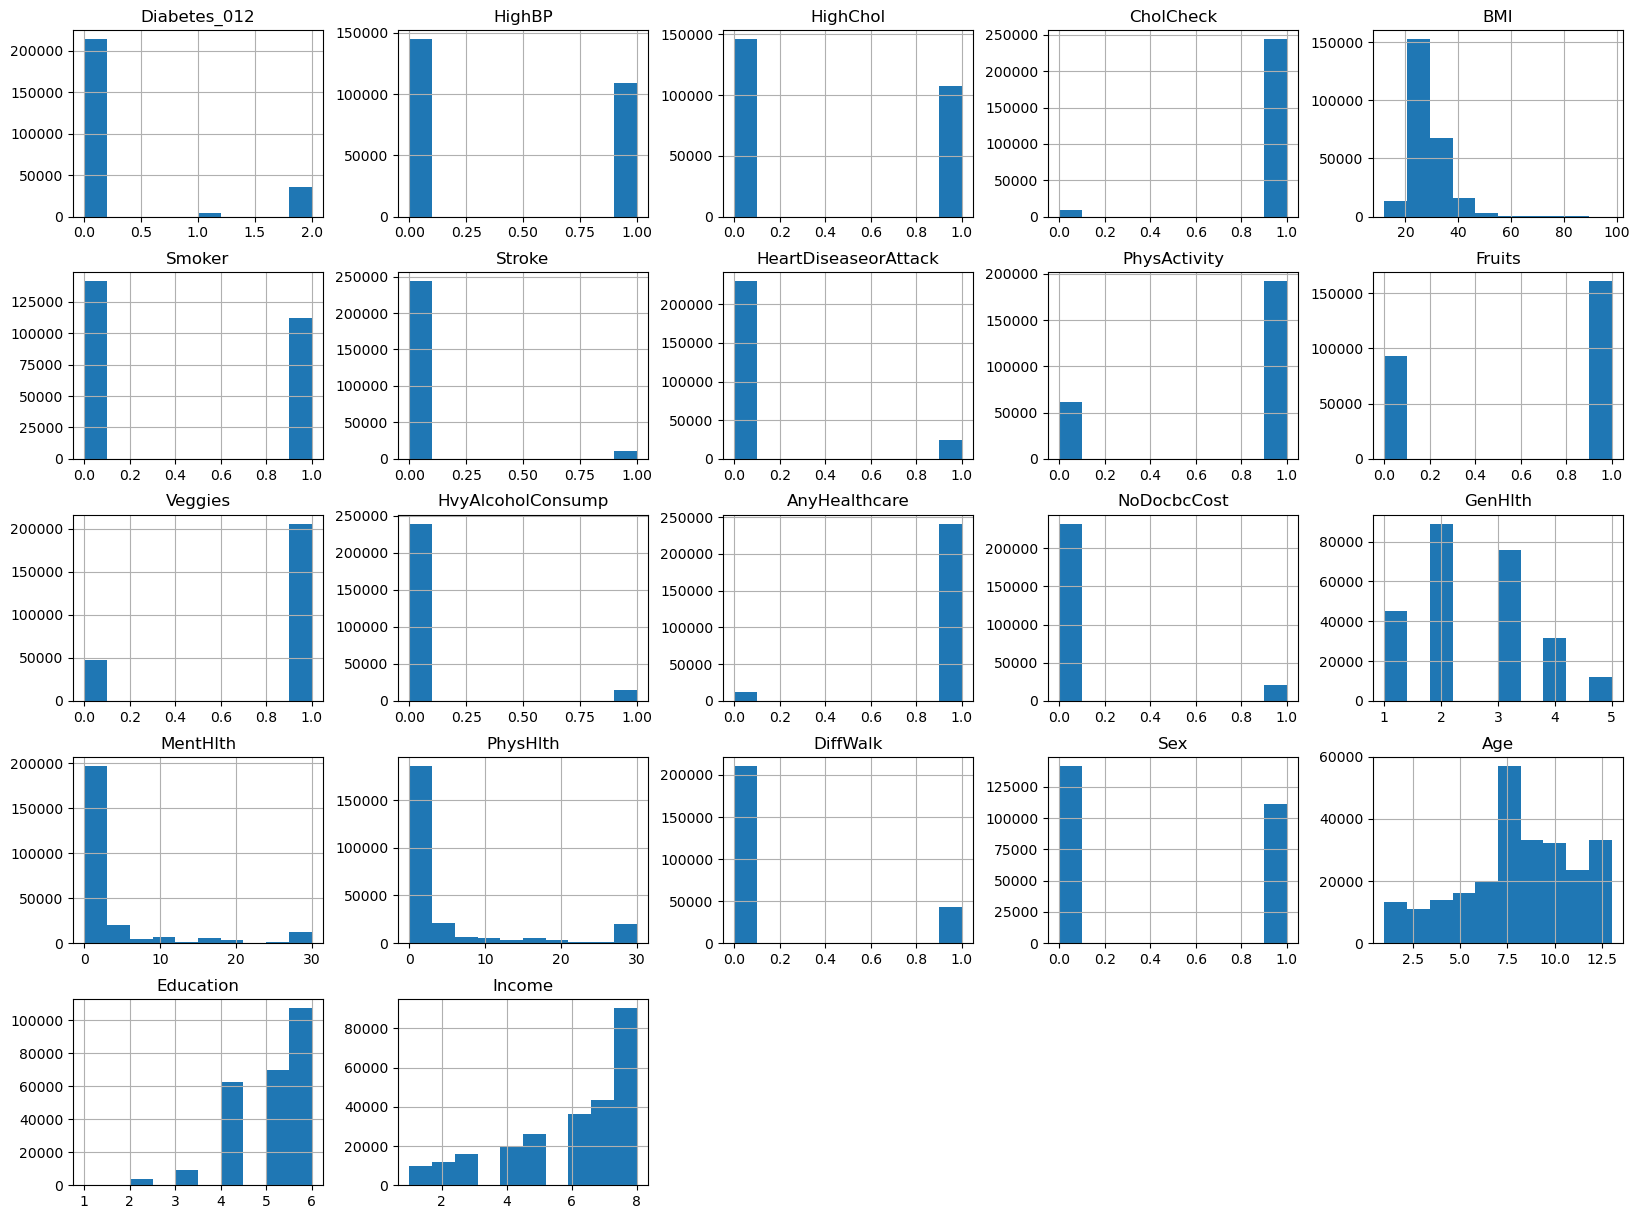

In [11]:
data.hist(figsize=(20,15))

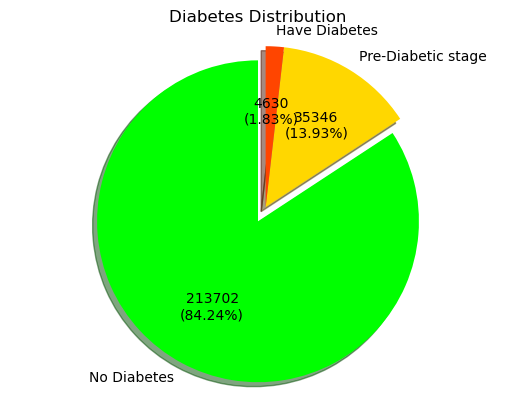

In [12]:
labels = ["No Diabetes", "Pre-Diabetic stage", "Have Diabetes"]
sizes = data["Diabetes_012"].value_counts()
colors = ['#00FF00', '#FFD700', '#FF4500'] 
explode = (0.1, 0, 0)
fig, ax = plt.subplots()
count_perc = lambda pct: f'{int(pct * sum(sizes) / 100)}\n({pct:.2f}%)'

ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct=count_perc,
       shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Diabetes Distribution')
plt.show()

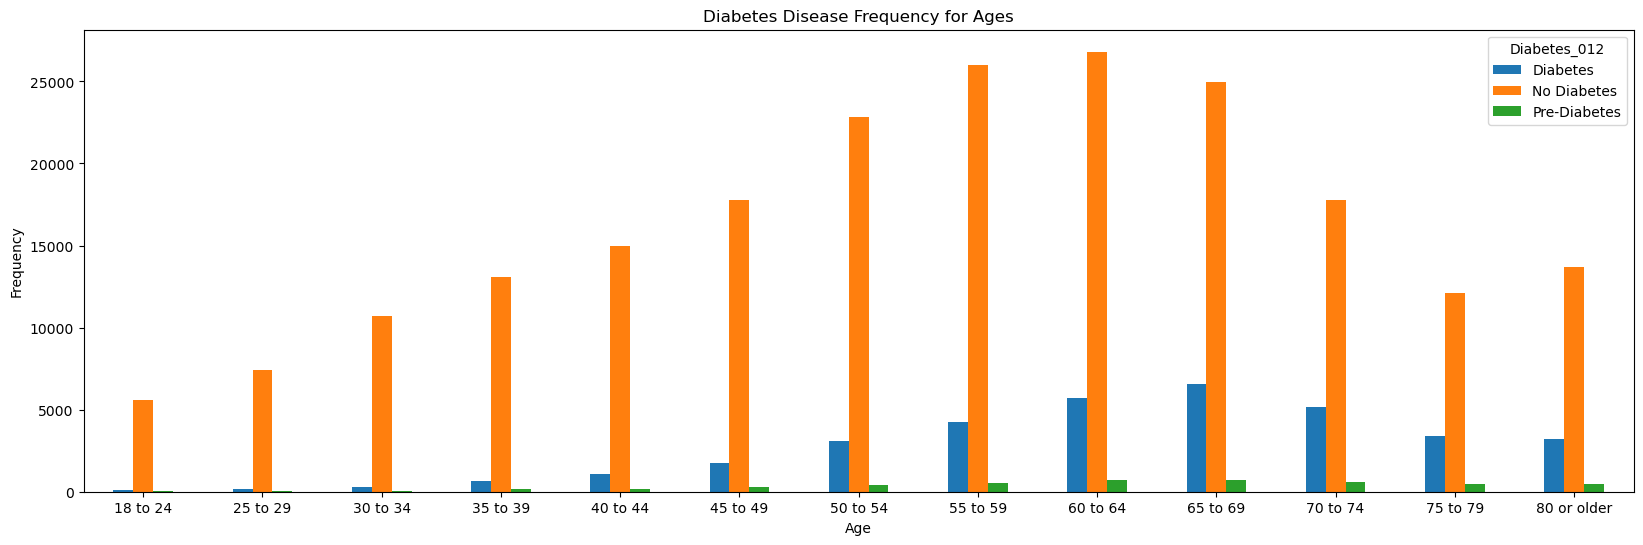

In [13]:
pd.crosstab(data2.Age,data2.Diabetes_012).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

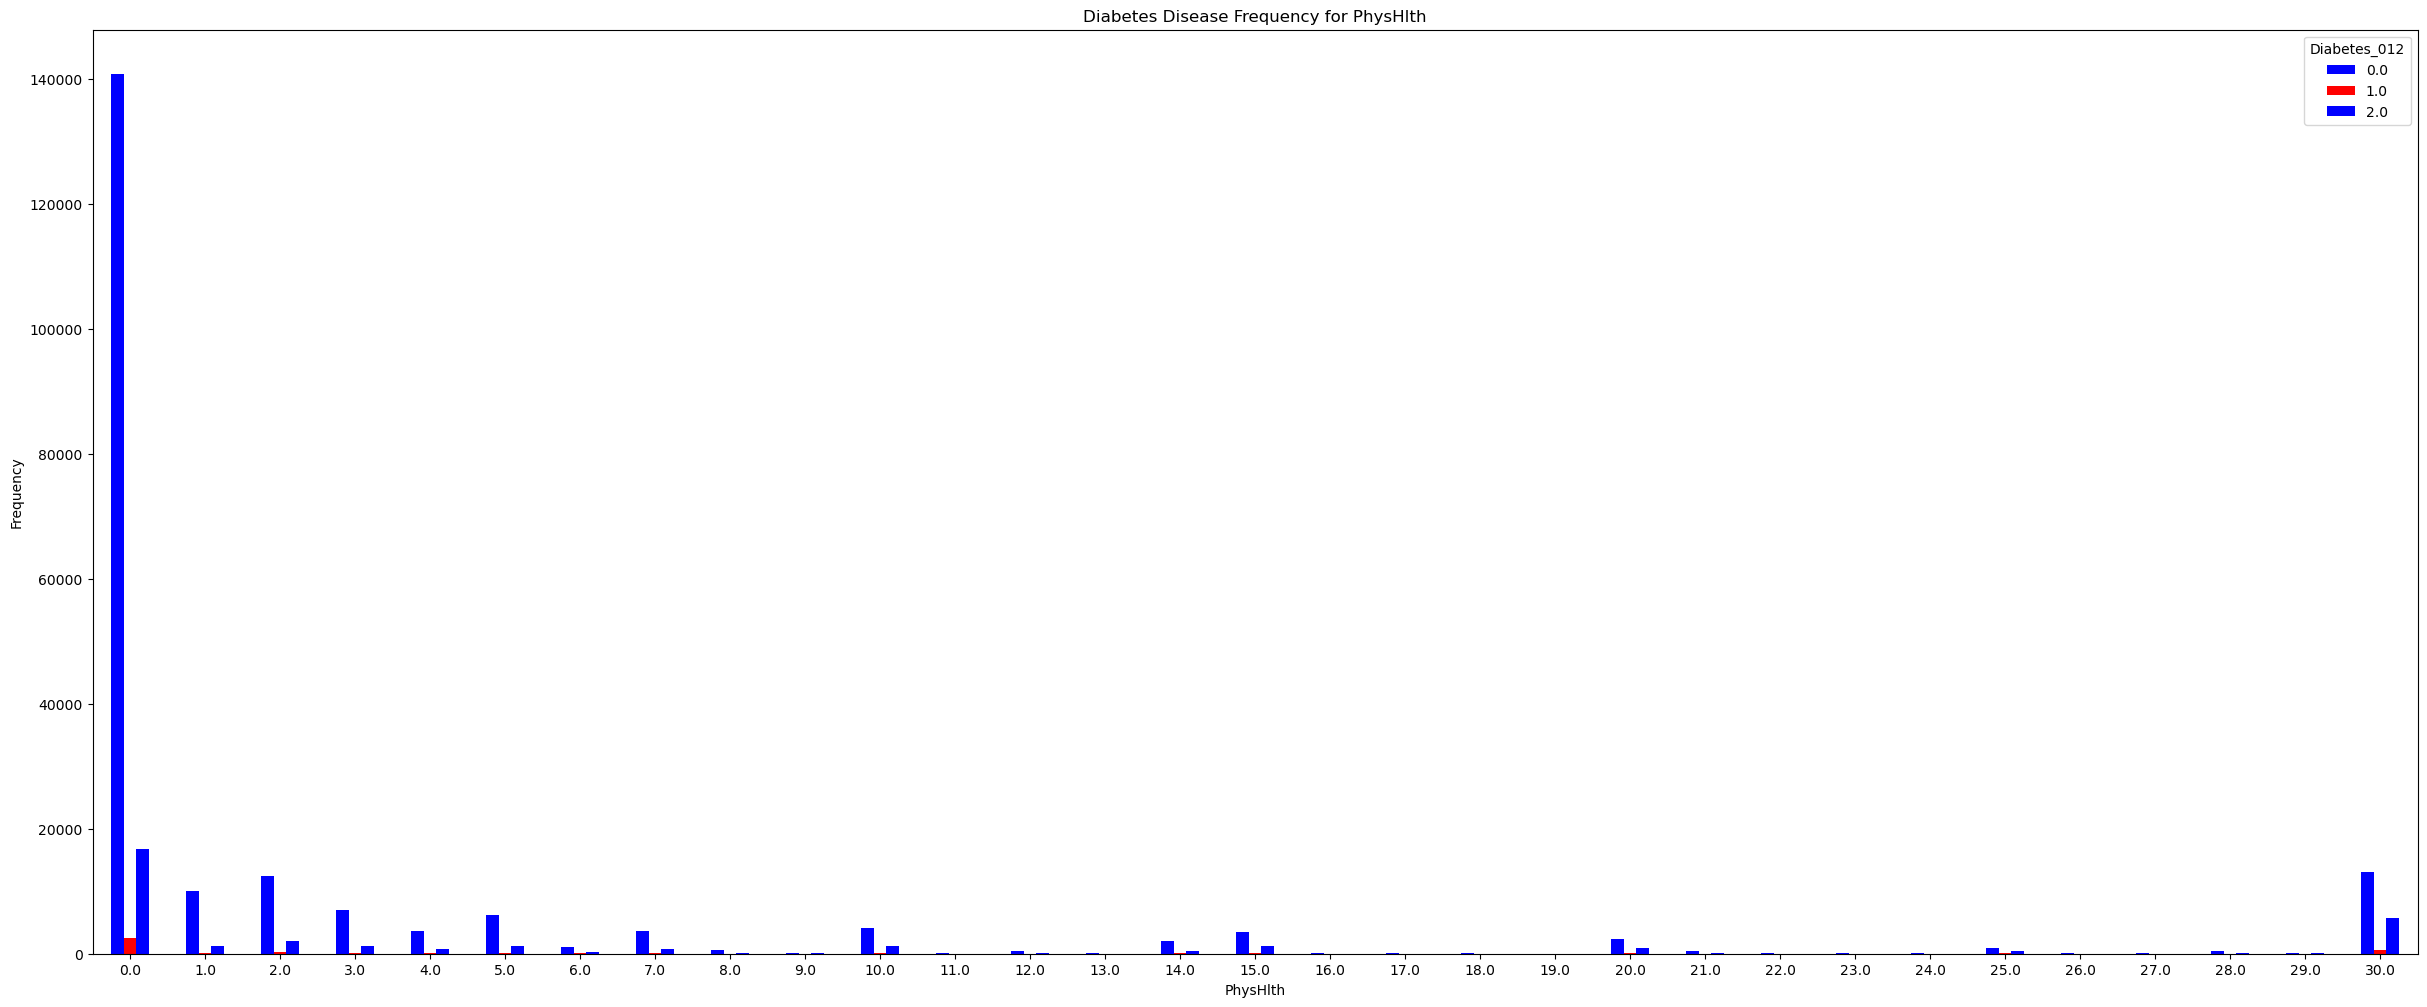

In [14]:
pd.crosstab(data.PhysHlth,data.Diabetes_012).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

<Axes: title={'center': 'Correlation with Diabetes_binary'}, xlabel='Column Names'>

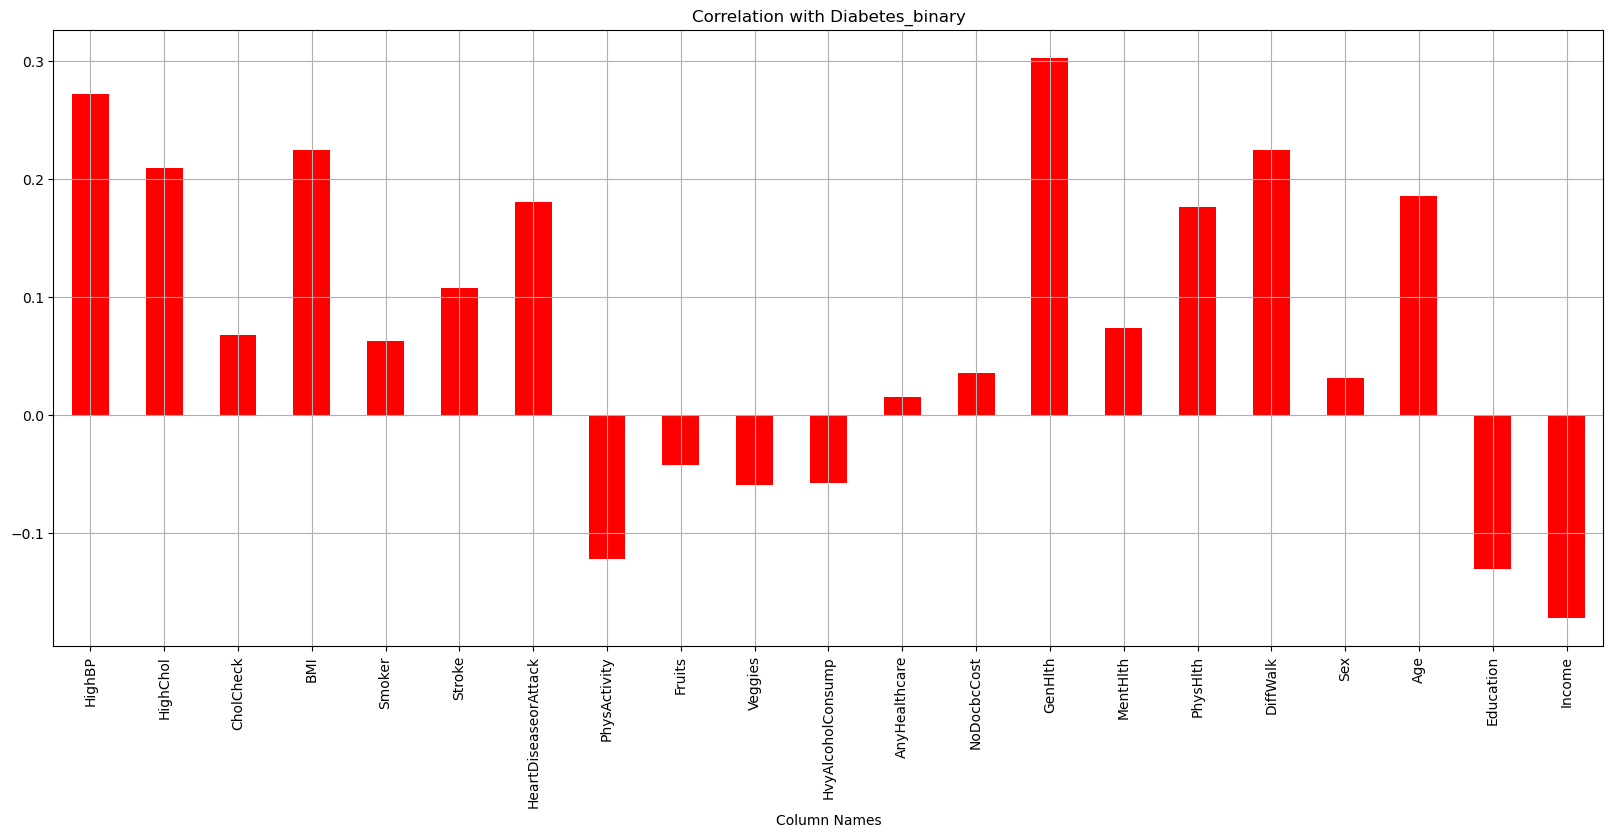

In [15]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="red")

Text(0.5, 1.0, 'correlation of feature')

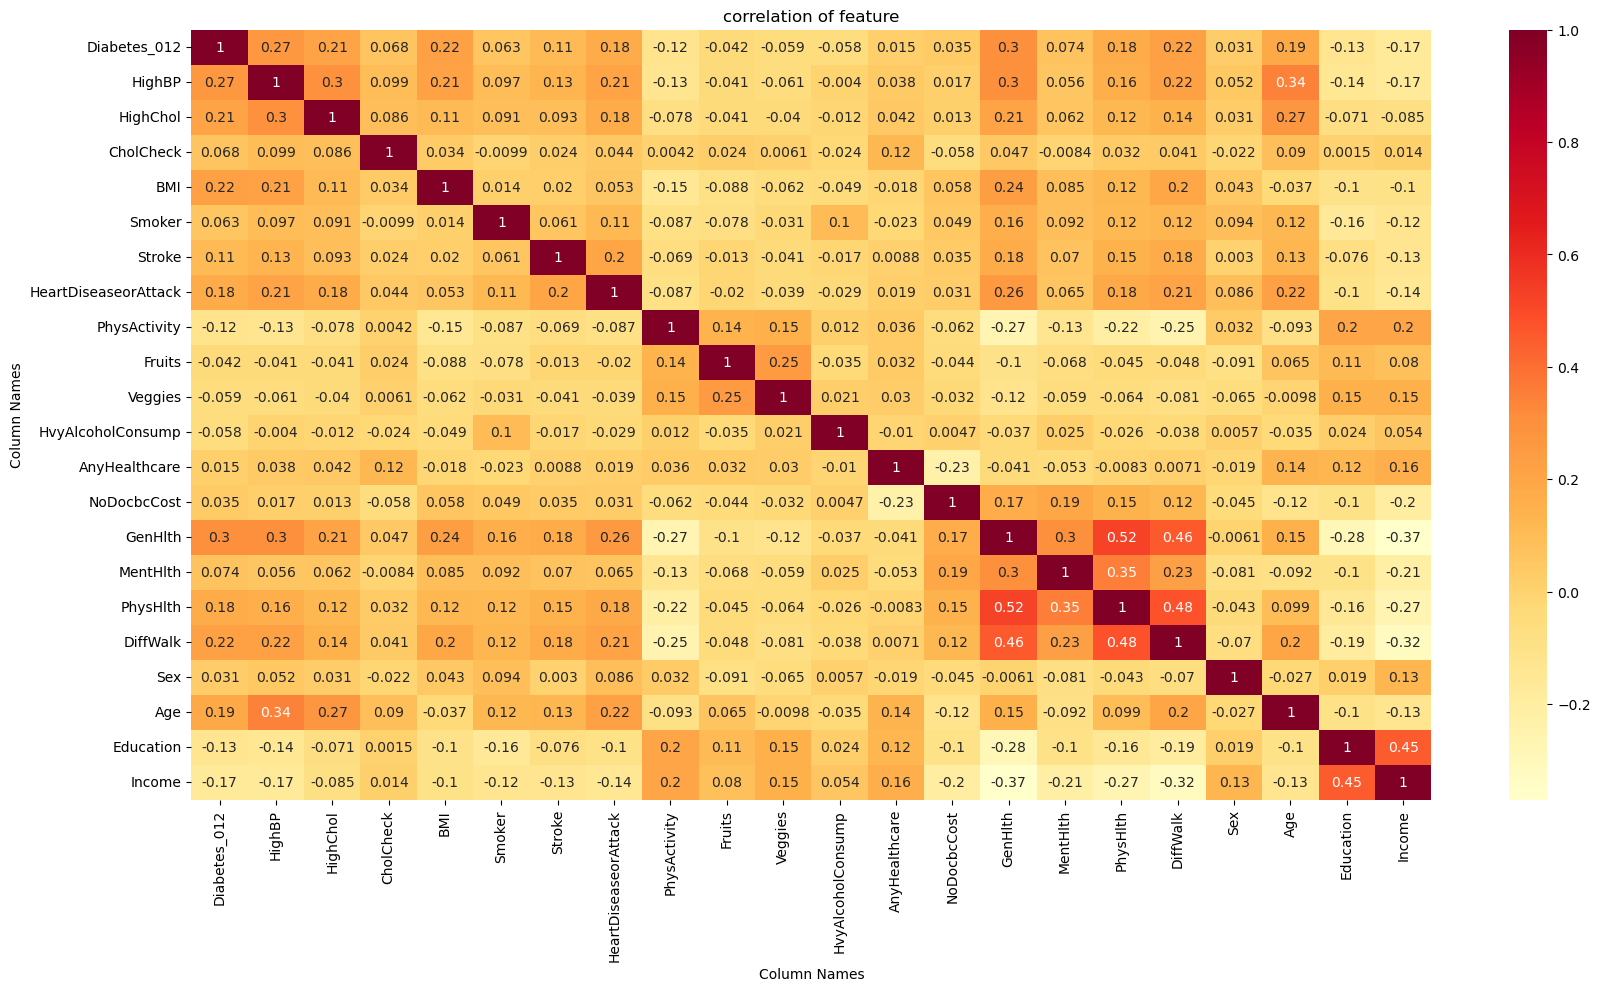

In [27]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

In [ ]:
#sns.pairplot(data)

### 4. Model Building :

### 4.1. Splitting the dataset :

In [16]:
X = data.drop("Diabetes_012", axis = 1)
y = data["Diabetes_012"]

### 4.2. Splitting the X and y into respective train and test data :

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### 4.3. Applying Standard Scalar to the train data :

In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
y_train = scalar.fit_transform(y_train)

### Logistic Regression :

In [19]:
lj = LogisticRegression(solver="liblinear").fit(X_train, y_train)
predict_lj = lj.predict(X_test)
acc_lj = accuracy_score(y_test, predict_lj)
print("The accuracy of logistic regression is : ", acc_lj)
print(classification_report(y_test, predict_lj))

The accuracy of logistic regression is :  0.8448964574792389
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     63926
         1.0       0.00      0.00      0.00      1381
         2.0       0.54      0.17      0.26     10797

    accuracy                           0.84     76104
   macro avg       0.47      0.38      0.39     76104
weighted avg       0.80      0.84      0.80     76104



### Naive Bayes :

In [20]:
gnb = GaussianNB().fit(X_train, y_train)
predict_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, predict_gnb)
print("The accuracy of Naive Bayes is : ", acc_gnb)
print(classification_report(y_test, predict_gnb))

The accuracy of Naive Bayes is :  0.7584489645747924
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.85     63926
         1.0       0.04      0.02      0.03      1381
         2.0       0.33      0.57      0.42     10797

    accuracy                           0.76     76104
   macro avg       0.43      0.47      0.43     76104
weighted avg       0.81      0.76      0.78     76104



### KNN :

In [21]:
knnc = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
predict_knnc = knnc.predict(X_test)
acc_knnc = accuracy_score(y_test, predict_knnc)
print("The accuracy of KNN is : ", acc_knnc)
print(classification_report(y_test, predict_knnc))

The accuracy of KNN is :  0.8202328392725744
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     63926
         1.0       0.07      0.01      0.01      1381
         2.0       0.38      0.24      0.29     10797

    accuracy                           0.82     76104
   macro avg       0.44      0.39      0.40     76104
weighted avg       0.78      0.82      0.80     76104



### Decision Tree :

In [22]:
cartc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
predict_cartc = cartc.predict(X_test)
acc_cartc = accuracy_score(y_test, predict_cartc)
print("The accuracy of Decision Tree using CART is : ", acc_cartc)
print(classification_report(y_test, predict_cartc))

The accuracy of Decision Tree using CART is :  0.7653342794071271
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     63926
         1.0       0.03      0.03      0.03      1381
         2.0       0.30      0.32      0.31     10797

    accuracy                           0.77     76104
   macro avg       0.40      0.40      0.40     76104
weighted avg       0.78      0.77      0.77     76104



### Random Forest :

In [23]:
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, predict_rfc)
print("The accuracy of Random Forest is : ", acc_rfc)
print(classification_report(y_test, predict_rfc))

The accuracy of Random Forest is :  0.8405997056659308
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     63926
         1.0       0.02      0.00      0.00      1381
         2.0       0.50      0.19      0.28     10797

    accuracy                           0.84     76104
   macro avg       0.46      0.39      0.40     76104
weighted avg       0.79      0.84      0.81     76104



### GradientBoosting :

In [24]:
gbmc = GradientBoostingClassifier(verbose=False).fit(X_train, y_train)
predict_gbmc = gbmc.predict(X_test)
acc_gbmc = accuracy_score(y_test, predict_gbmc)
print("The accuracy of Gradient Boosting is : ", acc_gbmc)
print(classification_report(y_test, predict_gbmc))

The accuracy of Gradient Boosting is :  0.8484310942920215
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     63926
         1.0       0.00      0.00      0.00      1381
         2.0       0.57      0.19      0.29     10797

    accuracy                           0.85     76104
   macro avg       0.48      0.39      0.40     76104
weighted avg       0.81      0.85      0.81     76104



### XGBoosting :

In [25]:
xgbc = XGBClassifier().fit(X_train, y_train)
predict_xgbc = xgbc.predict(X_test)
acc_xgbc = accuracy_score(y_test, predict_xgbc)
print("The accuracy of XGBoosting is : ", acc_xgbc)
print(classification_report(y_test, predict_xgbc))

The accuracy of XGBoosting is :  0.8479317775675391
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     63926
         1.0       0.00      0.00      0.00      1381
         2.0       0.56      0.20      0.29     10797

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.80      0.85      0.81     76104



### Light Gradient Boosting :

In [26]:
lgbmc = LGBMClassifier().fit(X_train, y_train)
predict_lgbmc = lgbmc.predict(X_test)
acc_lgbmc = accuracy_score(y_test, predict_lgbmc)
print("The accuracy of LightGradientBoosting is : ", acc_lgbmc)
print(classification_report(y_test, predict_lgbmc))

The accuracy of LightGradientBoosting is :  0.8484310942920215
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     63926
         1.0       0.00      0.00      0.00      1381
         2.0       0.58      0.18      0.28     10797

    accuracy                           0.85     76104
   macro avg       0.48      0.39      0.40     76104
weighted avg       0.81      0.85      0.81     76104



### 5. Saving the model in .pkl format :

In [ ]:
import pickle
pickle.dump(lj,open("diabetes_lj_model.pkl","wb"))